In [1]:
# 1) Kütüphaneler & Drive Mount
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
train = "./Animal_Detection0001/train"
test = "./Animal_Detection0001/test"

In [3]:
#vs-code icin
img_size    = 224
batch_size  = 32
epochs      = 10
learning_rate = 1e-4

In [4]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

train_normal = './Animal_Detection0001/train'

# Klasördeki tüm dosyaların listesini alma
files = os.listdir(train_normal)
print(files)

# İlk dosyayı açalım ve görüntüleyelim
def show_images():

    f, ax = plt.subplots(1, len(files), figsize=(30, 30))

    for i in range(len(files)):
        img = Image.open(train_normal + '/' + files[i])
        image = np.array(img)
        plt.title(f"Index: {i}")
        ax[i].imshow(image)
        ax[i].axis('off')
    plt.show()

#show_images()


['at', 'ayi', 'domuz', 'inek', 'kedi', 'kopek', 'koyun', 'kurt', 'tilki']


In [8]:
train_at_path = './Animal_Detection0001/train/at'
train_ayi_path = './Animal_Detection0001/train/ayi'
train_cat_path = './Animal_Detection0001/train/kedi'
train_domuz_path = './Animal_Detection0001/train/domuz'
train_inek_path = './Animal_Detection0001/train/inek'
train_kopek_path = './Animal_Detection0001/train/kopek'
train_kurt_path = './Animal_Detection0001/train/kurt'
train_koyun_path = './Animal_Detection0001/train/koyun'
train_tilki_path = './Animal_Detection0001/train/tilki'

test_at_path = './Animal_Detection0001/test/at'
test_ayi_path = './Animal_Detection0001/test/ayi'
test_cat_path = './Animal_Detection0001/test/kedi'
test_domuz_path = './Animal_Detection0001/test/domuz'
test_inek_path = './Animal_Detection0001/test/inek'
test_kopek_path = './Animal_Detection0001/test/kopek'
test_kurt_path = './Animal_Detection0001/test/kurt'
test_koyun_path = './Animal_Detection0001/test/koyun'
test_tilki_path = './Animal_Detection0001/test/tilki'

print(len(os.listdir(train_at_path)))
print(len(os.listdir(train_ayi_path)))
print(len(os.listdir(train_cat_path)))
print(len(os.listdir(train_domuz_path)))
print(len(os.listdir(train_inek_path)))
print(len(os.listdir(train_kopek_path)))
print(len(os.listdir(train_kurt_path)))
print(len(os.listdir(train_koyun_path)))
print(len(os.listdir(train_tilki_path)))

# Dosya listeleri
train_at = os.listdir(train_at_path)
train_ayi = os.listdir(train_ayi_path)
train_cat = os.listdir(train_cat_path)
train_domuz = os.listdir(train_domuz_path)
train_inek = os.listdir(train_inek_path)
train_kopek = os.listdir(train_kopek_path)
train_kurt = os.listdir(train_kurt_path)
train_koyun = os.listdir(train_koyun_path)
train_tilki = os.listdir(train_tilki_path)

test_at = os.listdir(test_at_path)
test_ayi = os.listdir(test_ayi_path)
test_cat = os.listdir(test_cat_path)
test_domuz = os.listdir(test_domuz_path)
test_inek = os.listdir(test_inek_path)
test_kopek = os.listdir(test_kopek_path)
test_kurt = os.listdir(test_kurt_path)
test_koyun = os.listdir(test_koyun_path)
test_tilki = os.listdir(test_tilki_path)

print(len(train_at))
print(len(train_ayi))
print(len(train_cat))
print(len(train_domuz))
print(len(train_inek))
print(len(train_kopek))
print(len(train_kurt))
print(len(train_koyun))
print(len(train_tilki))


120
120
120
120
121
120
118
120
120
120
120
120
120
121
120
118
120
120


In [9]:
from PIL import Image
import numpy as np
import os

training_size = 121

# Eğitim verilerinden örnek al
train_at_samples = train_at[:training_size]
train_ayi_samples = train_ayi[:training_size]
train_cat_samples = train_cat[:training_size]
train_domuz_samples = train_domuz[:training_size]
train_inek_samples = train_inek[:training_size]
train_kopek_samples = train_kopek[:training_size]
train_kurt_samples = train_kurt[:training_size]
train_koyun_samples = train_koyun[:training_size]
train_tilki_samples = train_tilki[:training_size]

# Test verilerinin tamamı
test_at_samples = test_at
test_ayi_samples = test_ayi
test_cat_samples = test_cat
test_domuz_samples = test_domuz
test_inek_samples = test_inek
test_kopek_samples = test_kopek
test_kurt_samples = test_kurt
test_koyun_samples = test_koyun
test_tilki_samples = test_tilki

# Yeniden boyutlandırma fonksiyonu
def resize_images(image_paths, base_path):
    resized_images = []
    for img_name in image_paths:
        img_path = os.path.join(base_path, img_name)
        try:
            img = Image.open(img_path).convert('RGB')
            img = img.resize((224, 224))
            img_array = np.array(img)
            resized_images.append(img_array)
        except Exception as e:
            print(f"Hata oluştu: {img_path}, {e}")
    return np.array(resized_images)

# Eğitim verilerini boyutlandır
train_at_resized = resize_images(train_at_samples, train_at_path)
train_ayi_resized = resize_images(train_ayi_samples, train_ayi_path)
train_cat_resized = resize_images(train_cat_samples, train_cat_path)
train_domuz_resized = resize_images(train_domuz_samples, train_domuz_path)
train_inek_resized = resize_images(train_inek_samples, train_inek_path)
train_kopek_resized = resize_images(train_kopek_samples, train_kopek_path)
train_kurt_resized = resize_images(train_kurt_samples, train_kurt_path)
train_koyun_resized = resize_images(train_koyun_samples, train_koyun_path)
train_tilki_resized = resize_images(train_tilki_samples, train_tilki_path)

# Test verilerini boyutlandır
test_at_resized = resize_images(test_at_samples, test_at_path)
test_ayi_resized = resize_images(test_ayi_samples, test_ayi_path)
test_cat_resized = resize_images(test_cat_samples, test_cat_path)
test_domuz_resized = resize_images(test_domuz_samples, test_domuz_path)
test_inek_resized = resize_images(test_inek_samples, test_inek_path)
test_kopek_resized = resize_images(test_kopek_samples, test_kopek_path)
test_kurt_resized = resize_images(test_kurt_samples, test_kurt_path)
test_koyun_resized = resize_images(test_koyun_samples, test_koyun_path)
test_tilki_resized = resize_images(test_tilki_samples, test_tilki_path)


In [10]:
import numpy as np

# Gri kanal (tek kanal) veriyi RGB'ye çevirmek için
def convert_to_rgb(data):
    if data.ndim == 4 and data.shape[-1] == 1:  # Eğer (N, H, W, 1) ise
        rgb_data = np.repeat(data, 3, axis=-1)
    elif data.ndim == 4 and data.shape[-1] == 3:  # Zaten RGB ise
        rgb_data = data
    else:
        raise ValueError("Veri boyutu beklenenden farklı.")
    return rgb_data

# RGB'ye çevir
X_train_rgb = np.concatenate((
    convert_to_rgb(train_at_resized),
    convert_to_rgb(train_ayi_resized),
    convert_to_rgb(train_cat_resized),
    convert_to_rgb(train_domuz_resized),
    convert_to_rgb(train_inek_resized),
    convert_to_rgb(train_kopek_resized),
    convert_to_rgb(train_kurt_resized),
    convert_to_rgb(train_koyun_resized),
    convert_to_rgb(train_tilki_resized)
), axis=0)

X_test_rgb = np.concatenate((
    convert_to_rgb(test_at_resized),
    convert_to_rgb(test_ayi_resized),
    convert_to_rgb(test_cat_resized),
    convert_to_rgb(test_domuz_resized),
    convert_to_rgb(test_inek_resized),
    convert_to_rgb(test_kopek_resized),
    convert_to_rgb(test_kurt_resized),
    convert_to_rgb(test_koyun_resized),
    convert_to_rgb(test_tilki_resized)
), axis=0)

# Etiketleri oluştur (her sınıfa bir ID verelim)
y_train = np.concatenate((
    np.full(len(train_at_resized), 0),
    np.full(len(train_ayi_resized), 1),
    np.full(len(train_cat_resized), 2),
    np.full(len(train_domuz_resized), 3),
    np.full(len(train_inek_resized), 4),
    np.full(len(train_kopek_resized), 5),
    np.full(len(train_kurt_resized), 6),
    np.full(len(train_koyun_resized), 7),
    np.full(len(train_tilki_resized), 8)
), axis=0)

y_test = np.concatenate((
    np.full(len(test_at_resized), 0),
    np.full(len(test_ayi_resized), 1),
    np.full(len(test_cat_resized), 2),
    np.full(len(test_domuz_resized), 3),
    np.full(len(test_inek_resized), 4),
    np.full(len(test_kopek_resized), 5),
    np.full(len(test_kurt_resized), 6),
    np.full(len(test_koyun_resized), 7),
    np.full(len(test_tilki_resized), 8)
), axis=0)

# Şekil bilgisi
print("X_train_rgb shape:", X_train_rgb.shape)
print("y_train shape:", y_train.shape)
print("X_test_rgb shape:", X_test_rgb.shape)
print("y_test shape:", y_test.shape)


X_train_rgb shape: (1079, 224, 224, 3)
y_train shape: (1079,)
X_test_rgb shape: (183, 224, 224, 3)
y_test shape: (183,)


In [11]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Etiketlerin oluşturulması (0'dan 8'e kadar)
y_train = np.array(
    [0] * len(train_at_resized) +
    [1] * len(train_ayi_resized) +
    [2] * len(train_cat_resized) +
    [3] * len(train_domuz_resized) +
    [4] * len(train_inek_resized) +
    [5] * len(train_kopek_resized) +
    [6] * len(train_kurt_resized) +
    [7] * len(train_koyun_resized) +
    [8] * len(train_tilki_resized)
)

y_test = np.array(
    [0] * len(test_at_resized) +
    [1] * len(test_ayi_resized) +
    [2] * len(test_cat_resized) +
    [3] * len(test_domuz_resized) +
    [4] * len(test_inek_resized) +
    [5] * len(test_kopek_resized) +
    [6] * len(test_kurt_resized) +
    [7] * len(test_koyun_resized) +
    [8] * len(test_tilki_resized)
)

# One-hot kodlama
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)

# Bilgi
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))
print("y_train[0] örneği (one-hot):", y_train[0])


Length of y_train: 1079
Length of y_test: 183
y_train[0] örneği (one-hot): [1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma için ImageDataGenerator kullanımı
datagen = ImageDataGenerator(
    rotation_range= 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
# Veri artırma işlemi
train_generator = datagen.flow(X_train_rgb, y_train, batch_size=16)

In [14]:
import numpy as np
from tensorflow.keras.applications import ResNet50

# modelini çağırma
ResNetModel = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Modeli oluşturma
x = ResNetModel.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(9, activation='softmax')(x)

# Modelin tanımlanması
model = Model(inputs=ResNetModel.input, outputs=output)

In [17]:
from tensorflow.keras.optimizers import Adamax
# Modelin derlenmesi

model.compile(
    optimizer= Adamax(learning_rate=0.0001),
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

In [21]:
#model eğitilmesi
epoch = 50

history = model.fit(
    train_generator,
    validation_data=(X_test_rgb, y_test),
    epochs= epoch,
    shuffle= True
)

Epoch 1/50
68/68 [==============================] - 144s 2s/step - loss: 1.3404 - accuracy: 0.5338 - val_loss: 0.7065 - val_accuracy: 0.8470
Epoch 2/50
68/68 [==============================] - 144s 2s/step - loss: 1.2746 - accuracy: 0.5449 - val_loss: 0.6628 - val_accuracy: 0.8852
Epoch 3/50
68/68 [==============================] - 144s 2s/step - loss: 1.1505 - accuracy: 0.6089 - val_loss: 0.5754 - val_accuracy: 0.8798
Epoch 4/50
68/68 [==============================] - 143s 2s/step - loss: 1.0451 - accuracy: 0.6348 - val_loss: 0.5008 - val_accuracy: 0.8689
Epoch 5/50
68/68 [==============================] - 144s 2s/step - loss: 1.0255 - accuracy: 0.6497 - val_loss: 0.4436 - val_accuracy: 0.9344
Epoch 6/50
68/68 [==============================] - 144s 2s/step - loss: 0.9159 - accuracy: 0.6812 - val_loss: 0.4115 - val_accuracy: 0.9235
Epoch 7/50
68/68 [==============================] - 143s 2s/step - loss: 0.8506 - accuracy: 0.7183 - val_loss: 0.3908 - val_accuracy: 0.8962
Epoch 8/50
68

1/1 [==============================] - 0s 82ms/step
Tahmin: kopek (Güven: 1.00)


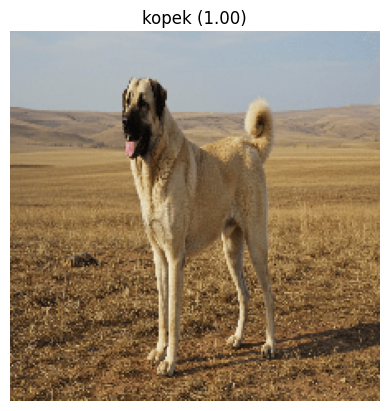

In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input

class_names = ['at', 'ayi', 'domuz', 'inek', 'kedi', 'kopek', 'koyun', 'kurt', 'tilki']

img_path = './image_1080.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)[0]
predicted_idx = np.argmax(pred)
predicted_label = class_names[predicted_idx]
confidence = pred[predicted_idx]

print(f"Tahmin: {predicted_label} (Güven: {confidence:.2f})")
plt.imshow(img)
plt.title(f"{predicted_label} ({confidence:.2f})")
plt.axis('off')
plt.show()



In [ ]:
model.save("animal_detection_model.h5")

In [40]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

cap = cv2.VideoCapture(0)

class_names = ['at', 'ayi', 'domuz', 'inek', 'kedi', 'kopek', 'koyun', 'kurt', 'tilki']
dangerous_animals = ['ayi', 'domuz', 'kurt', 'tilki']

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Kamera görüntüsünü modele uygun hale getir
    img = cv2.resize(frame, (224, 224))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Tahmin yap
    pred = model.predict(img_array)[0]
    predicted_idx = np.argmax(pred)
    predicted_label = class_names[predicted_idx]
    confidence = pred[predicted_idx]

    # Ekrana yaz
    label = f"{predicted_label} ({confidence:.2f})"
    cv2.putText(frame, label, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Tahmin', frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC tuşu ile çıkış
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 80ms/step


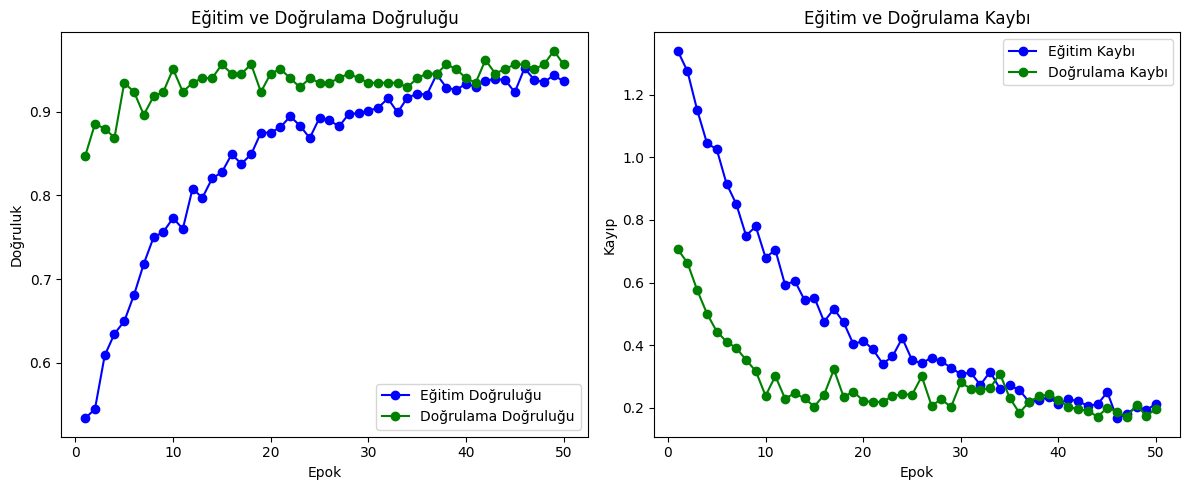

In [41]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Eğitim Doğruluğu')
plt.plot(epochs, val_acc, 'go-', label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'go-', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epok')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

6/6 [==============================] - 7s 1s/step


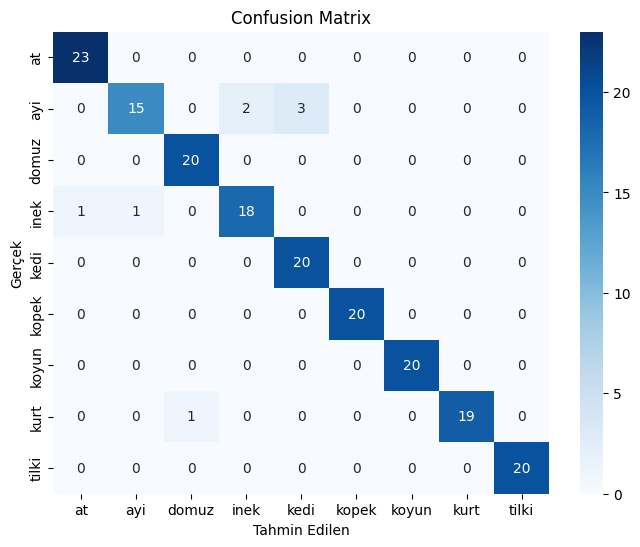

In [46]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_test_int = np.argmax(y_test, axis=1)  # One-hot'dan integer label'a çevir

cm = confusion_matrix(y_test_int, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()
